# Traffic Data Analysis

In [1]:
# Import libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
import calendar

In [2]:
# Downlaod Dataset from https://www.kaggle.com/datasets/petermayich/car-crashes-chicago-2019-2022

In [3]:
# Load the data
df_traffic = pd.read_csv('/Users/moni/DS - Karan/Week4/Data/chicago_2019_2022.csv', dtype={'column_name': str}, low_memory=False)
df_traffic.head()

id crash_date crash_time             town     city     state  \
0  200319661   07/18/19      10:35  harwood heights  chicago  illinois   
1  200320852   07/21/19      13:45        englewood  chicago  illinois   
2  200320894   07/21/19      16:00           cragin  chicago  illinois   
3  200320909   07/21/19      16:45           cragin  chicago  illinois   
4  200320967   07/21/19      23:05           cicero  chicago  illinois   

  country total_injured total_killed injury_incapacitated  ... windgust  \
0     usa             0            0                    0  ...       \N   
1     usa             0            0                    0  ...       \N   
2     usa             0            0                    0  ...       \N   
3     usa             0            0                    0  ...       \N   
4     usa             0            0                    0  ...       \N   

  windspeed winddir pressure visibility  cloudcover              conditions  \
0       6.9   193.0   1013.9        1.8        54.6  Rain, Partially cloudy   
1      11.4     3.0   1013.3        7.4        87.4  Rain, Partially cloudy   
2      13.7    17.0   1013.6        9.9        58.2  Rain, Partially cloudy   
3      13.7    17.0   1013.6        9.9        58.3  Rain, Partially cloudy   
4       4.9   342.0   1018.4        9.9         0.0                   Clear   

   sunrise    sunset moonphase  
0  5:31:20  20:23:09      0.56  
1  5:33:58  20:19:28      0.66  
2  5:33:54  20:20:12      0.66  
3  5:33:53  20:20:10      0.66  
4  5:34:53  20:19:06      0.69  

[5 rows x 65 columns]

In [4]:
# About the data set:
# The dataset used for this analysis consists of car crashes in the city of Chicago. It includes various features such as 
# date and time, location, weather, injuries and other relevant details.
# Dataset contains categorical variables such as contributory cause, road conditions, traffic control devices and numerical variables 
# like number of injuries, temperature, number of damaged vehicles, etc.
# Dataset containes 370k + records.

In [5]:
# Dataframe discription
print(df_traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372062 entries, 0 to 372061
Data columns (total 65 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                372062 non-null  int64  
 1   crash_date                        372062 non-null  object 
 2   crash_time                        372062 non-null  object 
 3   town                              372062 non-null  object 
 4   city                              372062 non-null  object 
 5   state                             372062 non-null  object 
 6   country                           372062 non-null  object 
 7   total_injured                     372062 non-null  object 
 8   total_killed                      372062 non-null  object 
 9   injury_incapacitated              372062 non-null  object 
 10  injury_non_incapacitated          372062 non-null  object 
 11  most_severe_injury                372062 non-null  o

## Data Cleaning

In [6]:
# First find out which unique valuese we have in Country, City and State
print('unique country count: ',df_traffic['country'].nunique())
print('unique city count: ', df_traffic['city'].nunique())
print('unique state count: ', df_traffic['state'].unique())

unique country count:  1
unique city count:  1
unique state count:  ['illinois' 'indiana' '\\N']


In [7]:
# Country and City have just a unique value, So we I don't need to keep this column 
# The state should display illinois, so I delete rows with other data

In [8]:
# Delete unneccesary columns
df_traffic[df_traffic['state']!='illinois']
df_traffic_1 = df_traffic.copy();

df_traffic_1 = df_traffic_1[df_traffic_1['state']=='illinois']
df_traffic_1 = df_traffic_1.drop(columns=['country','city','state','id', 'windgust', 'winddir',
                          'moonphase','sunset','sunrise','days_tempmin', 'pressure',
                         'precip_type','days_tempmin', 'days_tempmax',
                          'days_temp', 'days_feelslikemin', 'days_feelslikemax',
                          'days_feelslike', 'days_dew', 'days_humidity', 'days_precip',
                          'days_precipprob', 'days_precipcover', 'days_preciptype',
                          'days_snow', 'days_snowdepth', 'days_windgust', 'days_windspeed',
                          'days_winddir', 'days_pressure',
                          'days_cloudcover', 'days_visibility', 'days_uvindex',
                          'days_conditions', 'days_moonphase', 'feelslike', 'injury_non_incapacitated','snow',
                          'dew','precipprob'
                         ])

column_names = df_traffic_1.columns.tolist()
print('total columns: ',len(column_names),'\n')

df_traffic_1.head()

total columns:  26 



crash_date crash_time             town total_injured total_killed  \
0   07/18/19      10:35  harwood heights             0            0   
1   07/21/19      13:45        englewood             0            0   
2   07/21/19      16:00           cragin             0            0   
3   07/21/19      16:45           cragin             0            0   
4   07/21/19      23:05           cicero             0            0   

  injury_incapacitated       most_severe_injury                crash_type  \
0                    0  no indication of injury                  rear end   
1                    0  no indication of injury                  rear end   
2                    0  no indication of injury  sideswipe same direction   
3                    0  no indication of injury                   turning   
4                    0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  lattitude  \
0                      weather         unable to determine  ...  41.998354   
1          unable to determine              not applicable  ...  41.765266   
2  improper overtaking/passing  improper turning/no signal  ...  41.902855   
3          unable to determine              not applicable  ...  41.899822   
4          unable to determine              not applicable  ...  41.844581   

   longitude  temp humidity precip snowdepth  windspeed  visibility  \
0 -87.806638  72.6     92.9  0.354         0        6.9         1.8   
1 -87.634811  72.3     95.0  0.199         0       11.4         7.4   
2 -87.717722  74.6     71.6  0.029         0       13.7         9.9   
3 -87.711439  74.5     72.2  0.030         0       13.7         9.9   
4 -87.695242  66.5     59.4  0.000         0        4.9         9.9   

   cloudcover              conditions  
0        54.6  Rain, Partially cloudy  
1        87.4  Rain, Partially cloudy  
2        58.2  Rain, Partially cloudy  
3        58.3  Rain, Partially cloudy  
4         0.0                   Clear  

[5 rows x 26 columns]

In [9]:
# check the data types again
print(df_traffic_1.dtypes)

crash_date                           object
crash_time                           object
town                                 object
total_injured                        object
total_killed                         object
injury_incapacitated                 object
most_severe_injury                   object
crash_type                           object
contributory_cause                   object
sec_contributory_cause               object
num_vehicles_in_crash                 int64
crash_hit_and_run                    object
crash_severity                       object
traffic_control_device               object
traffic_control_device_condition     object
road_defect                          object
lattitude                           float64
longitude                           float64
temp                                float64
humidity                            float64
precip                              float64
snowdepth                            object
windspeed                       

In [10]:
# Missing values
# check null values
df_traffic_2 = df_traffic_1.copy()
df_traffic_2.isnull().sum()

crash_date                          0
crash_time                          0
town                                0
total_injured                       0
total_killed                        0
injury_incapacitated                0
most_severe_injury                  0
crash_type                          0
contributory_cause                  0
sec_contributory_cause              0
num_vehicles_in_crash               0
crash_hit_and_run                   0
crash_severity                      0
traffic_control_device              0
traffic_control_device_condition    0
road_defect                         0
lattitude                           0
longitude                           0
temp                                0
humidity                            0
precip                              0
snowdepth                           0
windspeed                           0
visibility                          0
cloudcover                          0
conditions                          0
dtype: int64

In [11]:
# Missing values
# check \\N values
count_occurrences = df_traffic_2.apply(lambda x: (x == '\\N').sum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(count_occurrences)


crash_date                               0
crash_time                               0
town                                     0
total_injured                          873
total_killed                           873
injury_incapacitated                   873
most_severe_injury                     874
crash_type                               0
contributory_cause                       0
sec_contributory_cause                   0
num_vehicles_in_crash                    0
crash_hit_and_run                   249252
crash_severity                           0
traffic_control_device                   0
traffic_control_device_condition         0
road_defect                              0
lattitude                                0
longitude                                0
temp                                     0
humidity                                 0
precip                                   0
snowdepth                                0
windspeed                                0
visibility 

In [12]:
# We removed '\\N' from dataset and replace it with desired data
df_traffic_2['total_injured'] = df_traffic_2['total_injured'].replace('\\N', '-1')
df_traffic_2['injury_incapacitated'] = df_traffic_2['total_killed'].replace('\\N', '-1')
df_traffic_2['total_killed'] = df_traffic_2['total_killed'].replace('\\N', '-1')
df_traffic_2['most_severe_injury'] = df_traffic_2['most_severe_injury'].replace('\\N', 'unknown')
df_traffic_2['crash_hit_and_run'] = df_traffic_2['crash_hit_and_run'].replace('\\N', 'unknown')

In [13]:
# check \\N values again
count_occurrences = df_traffic_2.apply(lambda x: (x == '\\N').sum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(count_occurrences)


crash_date                          0
crash_time                          0
town                                0
total_injured                       0
total_killed                        0
injury_incapacitated                0
most_severe_injury                  0
crash_type                          0
contributory_cause                  0
sec_contributory_cause              0
num_vehicles_in_crash               0
crash_hit_and_run                   0
crash_severity                      0
traffic_control_device              0
traffic_control_device_condition    0
road_defect                         0
lattitude                           0
longitude                           0
temp                                0
humidity                            0
precip                              0
snowdepth                           0
windspeed                           0
visibility                          0
cloudcover                          0
conditions                          0
dtype: int64

In [14]:
# Check unique data in categorical / count columns(crash_hit_and_run, total_injured, total_killed, most_severe_injury) 
# to see if the data is consistent
print(df_traffic_2['crash_hit_and_run'].unique())
print(df_traffic_2['total_injured'].unique())
print(df_traffic_2['total_killed'].unique())
print(df_traffic_2['most_severe_injury'].unique())

['unknown' 'Y' 'N' 'y' 'n']
['0' '1' '-1' '3' '2' '5' '7' '6' '4' '8' '21' '10' '15' '9' '12' '11'
 '13' '19' '16']
['0' '-1' '1' '2' '3']
['no indication of injury' 'reported, not evident'
 'nonincapacitating injury' 'incapacitating injury' 'unknown' 'fatal']


In [15]:
# crash_hit_and_run columns seems to have 2 indicators for positive (Y ,y) and negative (N, n) values.
df_traffic_2['crash_hit_and_run'] = df_traffic_2['crash_hit_and_run'].replace({'Y': 'yes', 'y': 'yes', 'N': 'no', 'n': 'no'})
print(df_traffic_2['crash_hit_and_run'].unique())

['unknown' 'yes' 'no']


In [16]:
# Change data types
df_traffic_3 = df_traffic_2.copy()
df_traffic_3['total_injured'] = pd.to_numeric(df_traffic_3['total_injured'], errors='coerce')
df_traffic_3['total_killed'] = pd.to_numeric(df_traffic_3['total_killed'], errors='coerce')
df_traffic_3['injury_incapacitated'] = pd.to_numeric(df_traffic_3['injury_incapacitated'], errors='coerce')
df_traffic_3['crash_hit_and_run'] = df_traffic_3['crash_hit_and_run'].astype('category')
df_traffic_3['crash_severity'] = df_traffic_3['crash_severity'].astype('category')
df_traffic_3['snowdepth'] = pd.to_numeric(df_traffic_3['snowdepth'], errors='coerce')
df_traffic_3['conditions'] = df_traffic_3['conditions'].astype('category')
print(df_traffic_3.dtypes)
df_traffic_3.head()

crash_date                            object
crash_time                            object
town                                  object
total_injured                          int64
total_killed                           int64
injury_incapacitated                   int64
most_severe_injury                    object
crash_type                            object
contributory_cause                    object
sec_contributory_cause                object
num_vehicles_in_crash                  int64
crash_hit_and_run                   category
crash_severity                      category
traffic_control_device                object
traffic_control_device_condition      object
road_defect                           object
lattitude                            float64
longitude                            float64
temp                                 float64
humidity                             float64
precip                               float64
snowdepth                            float64
windspeed 

crash_date crash_time             town  total_injured  total_killed  \
0   07/18/19      10:35  harwood heights              0             0   
1   07/21/19      13:45        englewood              0             0   
2   07/21/19      16:00           cragin              0             0   
3   07/21/19      16:45           cragin              0             0   
4   07/21/19      23:05           cicero              0             0   

   injury_incapacitated       most_severe_injury                crash_type  \
0                     0  no indication of injury                  rear end   
1                     0  no indication of injury                  rear end   
2                     0  no indication of injury  sideswipe same direction   
3                     0  no indication of injury                   turning   
4                     0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  lattitude  \
0                      weather         unable to determine  ...  41.998354   
1          unable to determine              not applicable  ...  41.765266   
2  improper overtaking/passing  improper turning/no signal  ...  41.902855   
3          unable to determine              not applicable  ...  41.899822   
4          unable to determine              not applicable  ...  41.844581   

   longitude  temp humidity precip snowdepth  windspeed  visibility  \
0 -87.806638  72.6     92.9  0.354       0.0        6.9         1.8   
1 -87.634811  72.3     95.0  0.199       0.0       11.4         7.4   
2 -87.717722  74.6     71.6  0.029       0.0       13.7         9.9   
3 -87.711439  74.5     72.2  0.030       0.0       13.7         9.9   
4 -87.695242  66.5     59.4  0.000       0.0        4.9         9.9   

   cloudcover              conditions  
0        54.6  Rain, Partially cloudy  
1        87.4  Rain, Partially cloudy  
2        58.2  Rain, Partially cloudy  
3        58.3  Rain, Partially cloudy  
4         0.0                   Clear  

[5 rows x 26 columns]

## Analayzing

In [17]:
df_traffic_clean =  df_traffic_3.copy()
column_info = []
for column in df_traffic_clean.columns:
    unique_values = df_traffic_clean[column].unique()
    num_unique_values = len(unique_values)
    data_type = df_traffic_clean[column].dtype
    column_info.append([column, data_type, num_unique_values, unique_values])

column_table = pd.DataFrame(column_info, columns=['Column Name', 'Data Type', 'Number of Unique Values', 'Unique Values'])
column_table

Column Name Data Type  Number of Unique Values  \
0                         crash_date    object                     1294   
1                         crash_time    object                     1440   
2                               town    object                       69   
3                      total_injured     int64                       19   
4                       total_killed     int64                        5   
5               injury_incapacitated     int64                        5   
6                 most_severe_injury    object                        6   
7                         crash_type    object                       18   
8                 contributory_cause    object                       40   
9             sec_contributory_cause    object                       40   
10             num_vehicles_in_crash     int64                       14   
11                 crash_hit_and_run  category                        3   
12                    crash_severity  category                        2   
13            traffic_control_device    object                       19   
14  traffic_control_device_condition    object                        8   
15                       road_defect    object                        7   
16                         lattitude   float64                   178974   
17                         longitude   float64                   178788   
18                              temp   float64                     1176   
19                          humidity   float64                      893   
20                            precip   float64                      608   
21                         snowdepth   float64                      154   
22                         windspeed   float64                      378   
23                        visibility   float64                      100   
24                        cloudcover   float64                     1001   
25                        conditions  category                        8   

                                        Unique Values  
0   [07/18/19, 07/21/19, 07/22/19, 07/26/19, 07/27...  
1   [10:35, 13:45, 16:00, 16:45, 23:05, 23:18, 2:0...  
2   [harwood heights, englewood, cragin, cicero, a...  
3   [0, 1, -1, 3, 2, 5, 7, 6, 4, 8, 21, 10, 15, 9,...  
4                                    [0, -1, 1, 2, 3]  
5                                    [0, -1, 1, 2, 3]  
6   [no indication of injury, reported, not eviden...  
7   [rear end, sideswipe same direction, turning, ...  
8   [weather, unable to determine, improper overta...  
9   [unable to determine, not applicable, improper...  
10    [3, 2, 1, 4, 6, 5, 7, 12, 9, 8, 11, 14, 10, 15]  
11  ['unknown', 'yes', 'no']
Categories (3, object...  
12  ['major', 'minor']
Categories (2, object): ['m...  
13  [no controls, stop sign/flasher, traffic signa...  
14  [no controls, functioning properly, unknown, f...  
15  [no defects, unknown, rut, holes, shoulder def...  
16  [41.99835373, 41.76526572, 41.90285537, 41.899...  
17  [-87.80663814, -87.63481053, -87.71772227, -87...  
18  [72.6, 72.3, 74.6, 74.5, 66.5, 64.9, 70.4, 67....  
19  [92.9, 95.0, 71.6, 72.2, 59.4, 66.1, 67.5, 83....  
20  [0.354, 0.199, 0.029, 0.03, 0.0, 0.064, 0.31, ...  
21  [0.0, 0.5, 0.1, 0.8, 0.7, 1.0, 0.4, 2.3, 8.5, ...  
22  [6.9, 11.4, 13.7, 4.9, 4.5, 8.5, 12.7, 11.3, 1...  
23  [1.8, 7.4, 9.9, 9.6, 3.8, 9.8, 8.7, 8.6, 7.2, ...  
24  [54.6, 87.4, 58.2, 58.3, 0.0, 55.6, 79.0, 57.2...  
25  ['Rain, Partially cloudy', 'Clear', 'Partially...

In [18]:
print(df_traffic_clean.shape,'\n')
print(df_traffic_clean.describe())

(371997, 26) 

       total_injured   total_killed  injury_incapacitated  \
count  371997.000000  371997.000000         371997.000000   
mean        0.200058      -0.001019             -0.001019   
std         0.583721       0.062187              0.062187   
min        -1.000000      -1.000000             -1.000000   
25%         0.000000       0.000000              0.000000   
50%         0.000000       0.000000              0.000000   
75%         0.000000       0.000000              0.000000   
max        21.000000       3.000000              3.000000   

       num_vehicles_in_crash      lattitude      longitude           temp  \
count          371997.000000  371997.000000  371997.000000  371997.000000   
mean                2.039455      41.854500     -87.679257      54.597674   
std                 0.478413       0.086808       0.059811      21.454857   
min                 1.000000      41.644670     -87.936193     -23.000000   
25%                 2.000000      41.779227     -8

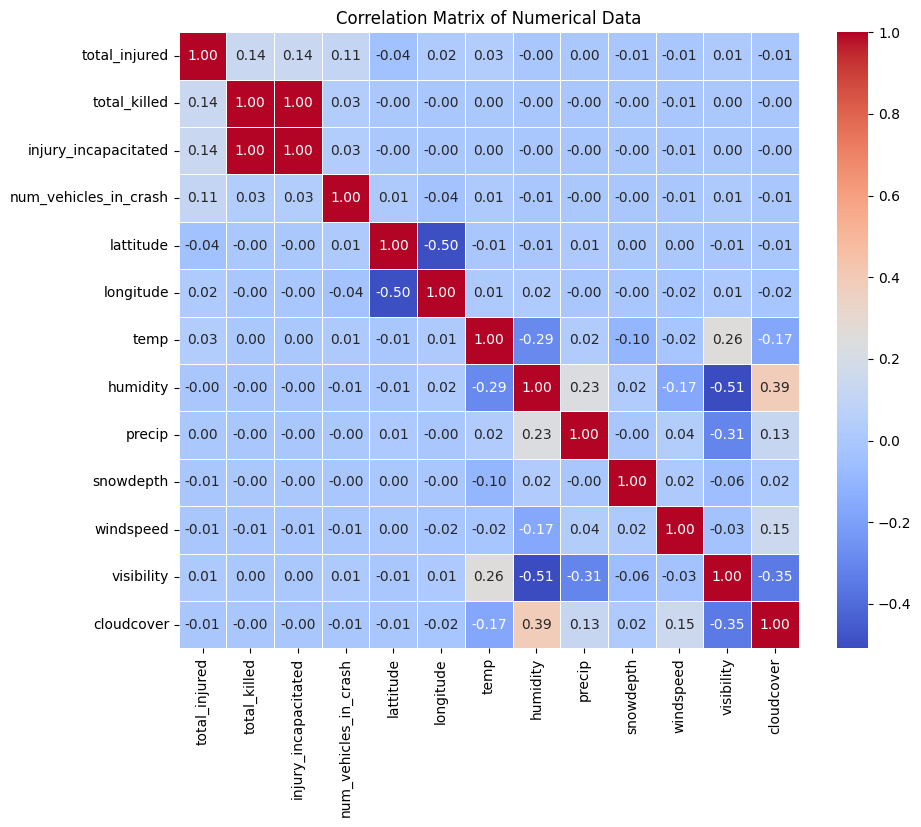

In [19]:
# Correlation matrix of numeric columns
numerical_columns = df_traffic_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Data')
plt.show()

In [20]:
# Total_killed <--> injury_incapacitated ++
# humidity <--> visibility --

In [21]:
# Instead of creating a MarkerCluster for each marker, you can use a FeatureGroup to add markers in bulk, which can be more efficient.

df_traffic_clean_subset = df_traffic_clean.head(140000)

map_center = [df_traffic_clean_subset['lattitude'].mean(), df_traffic_clean_subset['longitude'].mean()]
mymap_2 = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(mymap_2)

'''for index, row in df_traffic_clean_subset.iterrows():
    folium.Marker([row['lattitude'], row['longitude']]).add_to(marker_cluster)'''
    
FastMarkerCluster(data=list(zip(df_traffic_clean_subset['lattitude'], df_traffic_clean_subset['longitude']))).add_to(mymap_2)

mymap_2

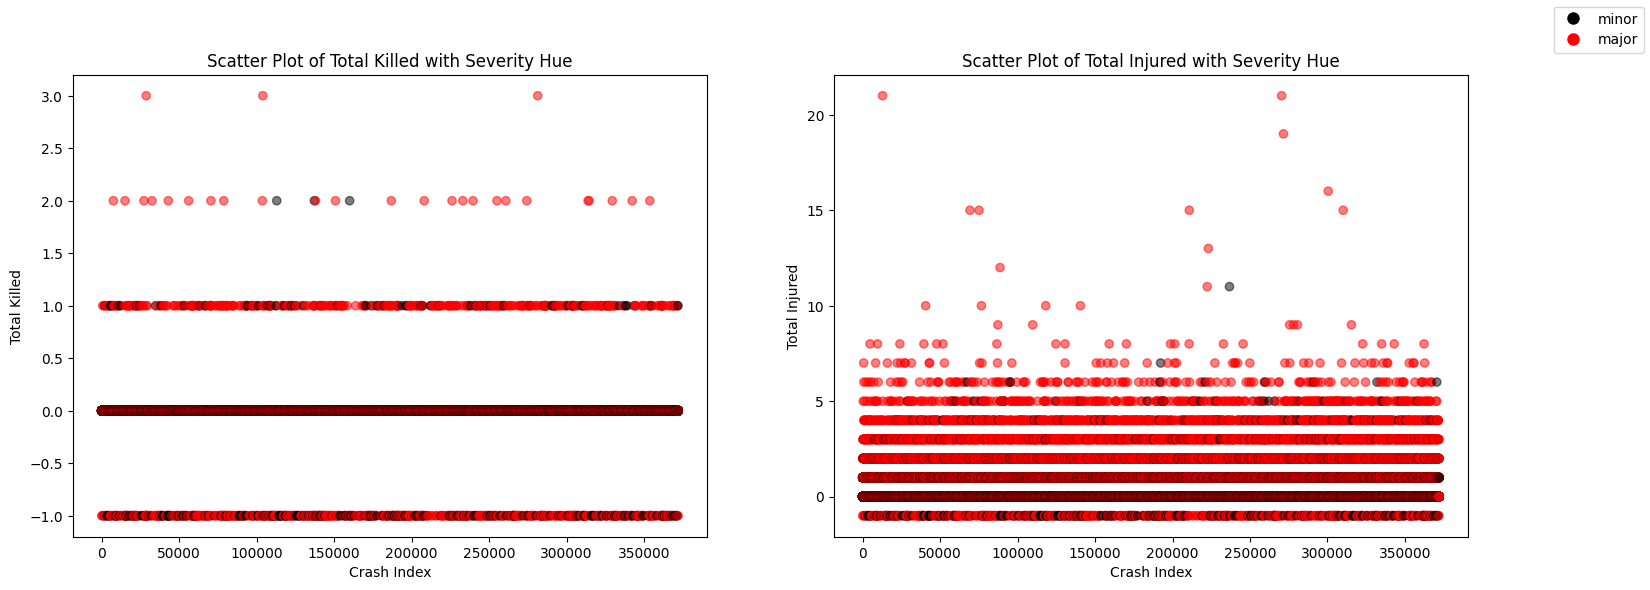

In [22]:
# Find out what contributes to crash_severity being major or minor
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

colors = {'minor': 'black', 'major': 'red'}

# Plot for Total Killed
scatter1 = axs[0].scatter(df_traffic_clean.index, df_traffic_clean['total_killed'], c=df_traffic_clean['crash_severity'].map(colors), alpha=0.5, label='Crash Severity')
axs[0].set_title('Scatter Plot of Total Killed with Severity Hue')
axs[0].set_xlabel('Crash Index')
axs[0].set_ylabel('Total Killed')

# Plot for Total Injured
scatter2 = axs[1].scatter(df_traffic_clean.index, df_traffic_clean['total_injured'], c=df_traffic_clean['crash_severity'].map(colors), alpha=0.5, label='Crash Severity')
axs[1].set_title('Scatter Plot of Total Injured with Severity Hue')
axs[1].set_xlabel('Crash Index')
axs[1].set_ylabel('Total Injured')

legend_labels = list(colors.keys())
legend_values = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[label], markersize=10) for label in legend_labels]
fig.legend(handles=legend_values, labels=legend_labels, loc='upper right')

plt.show()

In [23]:
# It seems like crashes with more than 0 fatalities and 5+ injuries are marked as minor crashes in our dataset.

In [24]:
# Create custom column which calculates crash severity by injury and fatality metric
temp_df = df_traffic_clean.copy()
incapacitating_mask = temp_df['most_severe_injury'].str.contains('incapacitating injury', case=False, na=False)
incapacitating_mask_2 = temp_df['most_severe_injury'].str.contains('fatal', case=False, na=False)

# Create 'crash_severity_2' column
temp_df['crash_severity_2'] = 'minor'  # Default to 'minor'
temp_df.loc[(temp_df['total_killed'] > 0) | (temp_df['total_injured'] > 6) | incapacitating_mask | incapacitating_mask_2, 'crash_severity_2'] = 'major'
temp_df.loc[(temp_df['total_killed'] == -1) & (temp_df['total_injured'] == -1) & ~incapacitating_mask_2 & ~incapacitating_mask, 'crash_severity_2'] = 'unknown'

# Display unique values and counts of the 'crash_severity_2' column
print(temp_df['crash_severity_2'].value_counts())

temp_df.head()

crash_severity_2
minor      332355
major       38769
unknown       873
Name: count, dtype: int64


crash_date crash_time             town  total_injured  total_killed  \
0   07/18/19      10:35  harwood heights              0             0   
1   07/21/19      13:45        englewood              0             0   
2   07/21/19      16:00           cragin              0             0   
3   07/21/19      16:45           cragin              0             0   
4   07/21/19      23:05           cicero              0             0   

   injury_incapacitated       most_severe_injury                crash_type  \
0                     0  no indication of injury                  rear end   
1                     0  no indication of injury                  rear end   
2                     0  no indication of injury  sideswipe same direction   
3                     0  no indication of injury                   turning   
4                     0  no indication of injury                   turning   

            contributory_cause      sec_contributory_cause  ...  longitude  \
0                      weather         unable to determine  ... -87.806638   
1          unable to determine              not applicable  ... -87.634811   
2  improper overtaking/passing  improper turning/no signal  ... -87.717722   
3          unable to determine              not applicable  ... -87.711439   
4          unable to determine              not applicable  ... -87.695242   

   temp humidity precip snowdepth windspeed  visibility  cloudcover  \
0  72.6     92.9  0.354       0.0       6.9         1.8        54.6   
1  72.3     95.0  0.199       0.0      11.4         7.4        87.4   
2  74.6     71.6  0.029       0.0      13.7         9.9        58.2   
3  74.5     72.2  0.030       0.0      13.7         9.9        58.3   
4  66.5     59.4  0.000       0.0       4.9         9.9         0.0   

               conditions  crash_severity_2  
0  Rain, Partially cloudy             minor  
1  Rain, Partially cloudy             minor  
2  Rain, Partially cloudy             minor  
3  Rain, Partially cloudy             minor  
4                   Clear             minor  

[5 rows x 27 columns]

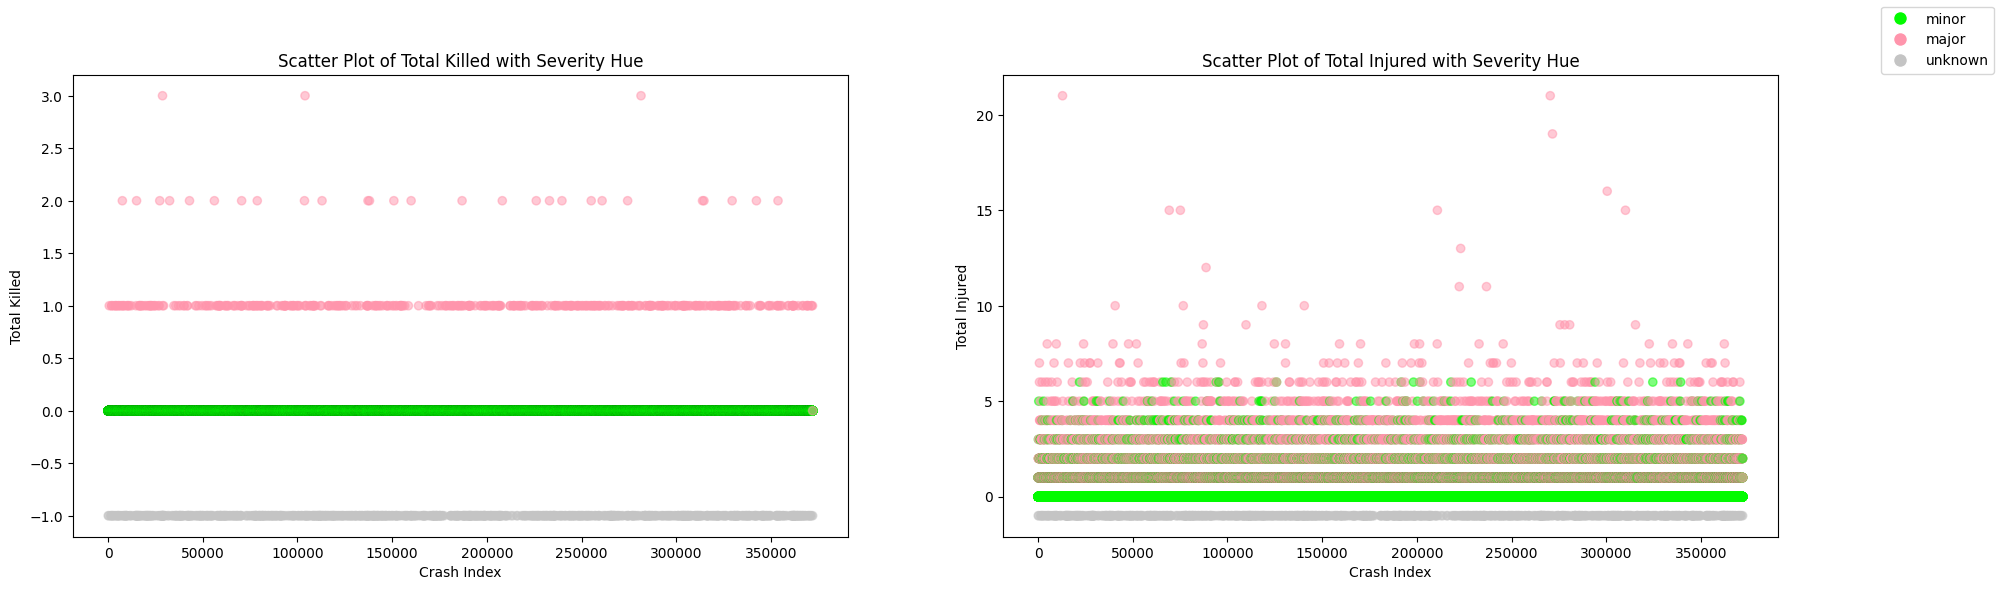

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(22, 6))

colors = {'minor': '#02fb00', 'major': '#ff95ac', 'unknown': '#c4c4c4'}

# Plot for Total Killed
axs[0].scatter(temp_df.index, temp_df['total_killed'], c=temp_df['crash_severity_2'].map(colors), alpha=0.5)
axs[0].set_title('Scatter Plot of Total Killed with Severity Hue')
axs[0].set_xlabel('Crash Index')
axs[0].set_ylabel('Total Killed')

# Plot for Total Injured
axs[1].scatter(temp_df.index, temp_df['total_injured'], c=temp_df['crash_severity_2'].map(colors), alpha=0.5)
axs[1].set_title('Scatter Plot of Total Injured with Severity Hue')
axs[1].set_xlabel('Crash Index')
axs[1].set_ylabel('Total Injured')

legend_labels = list(colors.keys())
legend_values = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[label], markersize=10) for label in legend_labels]
fig.legend(handles=legend_values, labels=legend_labels, loc='upper right')

plt.show()

In [ ]:
# this part make the notebook very large in a way i can't add it ot github, therefor I commented it
# Highlight areas of concern
'''import folium
from folium.plugins import FastMarkerCluster

temp_df = temp_df.head(140000)
# Check for missing values in 'latitude' and 'longitude'
missing_values = temp_df[['lattitude', 'longitude']].isnull().any()
if missing_values.any():
    print(f"Warning: Missing values in columns {missing_values[missing_values].index.tolist()}. Please handle or remove them.")

# Remove rows with missing values in 'latitude' or 'longitude'
temp_df = temp_df.dropna(subset=['lattitude', 'longitude'])

# Create a base map
map_center = [temp_df['lattitude'].mean(), temp_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create a FastMarkerCluster for better performance
FastMarkerCluster(data=list(zip(temp_df['lattitude'], temp_df['longitude']))).add_to(mymap)

# Iterate through the DataFrame to add custom markers and popups
for index, row in temp_df.iterrows():
    marker_color = 'red' if row['crash_severity_2'] == 'major' else 'blue'
    
    # Create a custom marker with a popup containing information
    folium.Marker([row['lattitude'], row['longitude']], 
                  icon=folium.Icon(color=marker_color),
                  popup=f"Severity: {row['crash_severity_2']}").add_to(mymap)

# Save or display the map
mymap'''


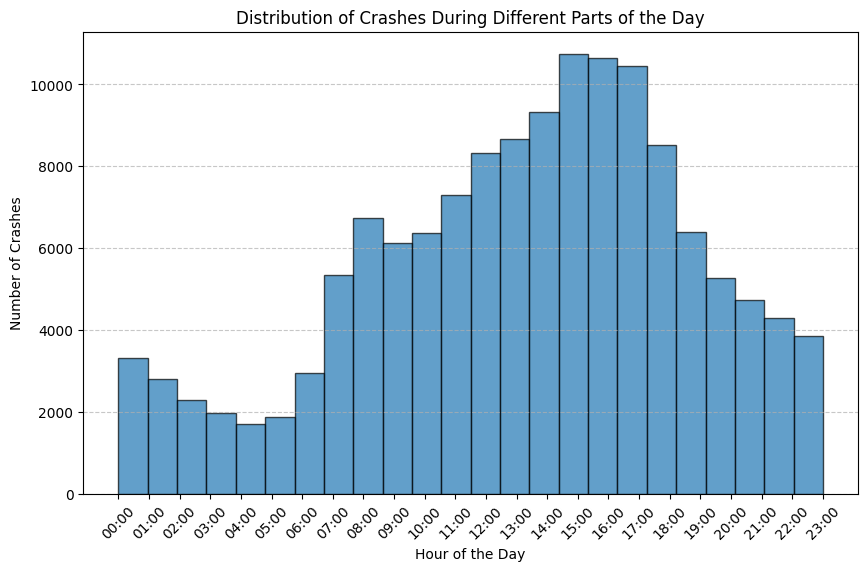

In [27]:
# Crashes by hour
temp_df['crash_time'] = pd.to_datetime(temp_df['crash_time'], format='%H:%M', errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(temp_df['crash_time'].dt.hour, bins=24, edgecolor='black', alpha=0.7)
plt.title('Distribution of Crashes During Different Parts of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(24), [f'{hour:02}:00' for hour in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# 14:00 - 18:00 hours have most crashes.

In [29]:
# Danger levels of each hour of the day
fd = temp_df[(temp_df['total_killed'] >= 0) & (temp_df['total_injured'] >= 0)]
hourly_data = fd.groupby(fd['crash_time'].dt.hour)[['total_killed', 'total_injured']].sum()
hourly_data

total_killed  total_injured
crash_time                             
0                      6            875
1                      8            720
2                     12            673
3                     14            498
4                      8            390
5                      3            368
6                      5            583
7                      1            889
8                      3           1199
9                      6           1120
10                     5           1103
11                     5           1306
12                     9           1425
13                     3           1554
14                     9           1767
15                     8           2018
16                     6           2040
17                     3           1980
18                     5           1845
19                    14           1439
20                     9           1270
21                    15           1176
22                    10           1178
23                    19           1034

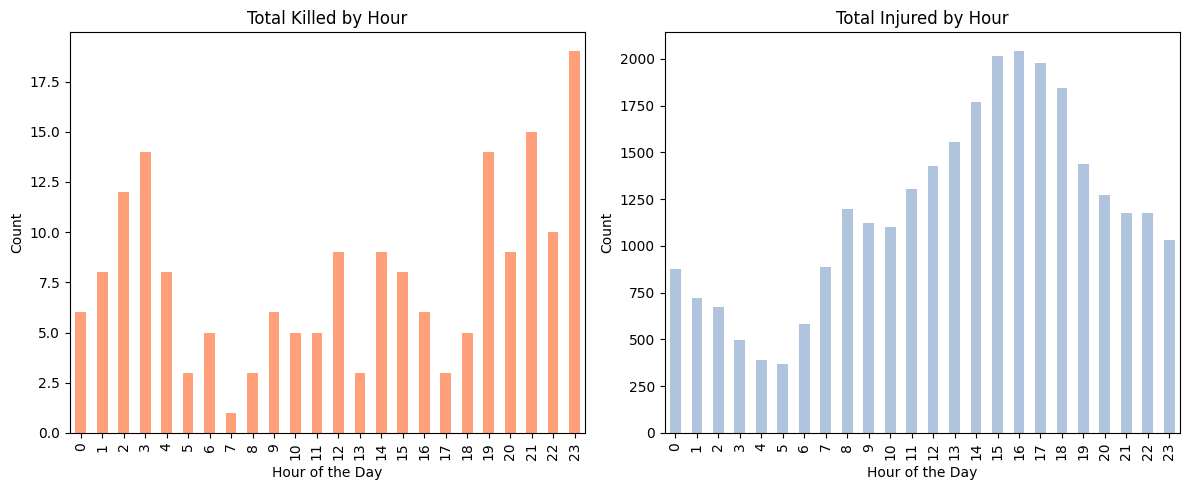

In [30]:
# Plot for total killed
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
hourly_data['total_killed'].plot(kind='bar', color='lightsalmon')  # Less saturated color
plt.title('Total Killed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Plot for total injured
plt.subplot(1, 2, 2)
hourly_data['total_injured'].plot(kind='bar', color='lightsteelblue')  # Less saturated color
plt.title('Total Injured by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
# While 2:00 PM and 5:00 PM exhibit the highest volumes of crashes and injuries, likely due to the afternoon commute and increased traffic, 
# it's noteworthy that during nighttime hours, characterized by lower traffic, there may be a higher risk of severe accidents.

In [32]:
# Crashes by day of the week
temp_df['crash_date'] = pd.to_datetime(temp_df['crash_date'], format='%m/%d/%y')
# Create a new column 'crash_day' with the day of the week
temp_df['crash_day'] = temp_df['crash_date'].dt.day_name()
temp_df[['crash_date', 'crash_day']]

crash_date crash_day
0      2019-07-18  Thursday
1      2019-07-21    Sunday
2      2019-07-21    Sunday
3      2019-07-21    Sunday
4      2019-07-21    Sunday
...           ...       ...
140025 2021-08-26  Thursday
140026 2021-08-26  Thursday
140027 2021-08-26  Thursday
140028 2021-08-26  Thursday
140029 2021-08-27    Friday

[140000 rows x 2 columns]

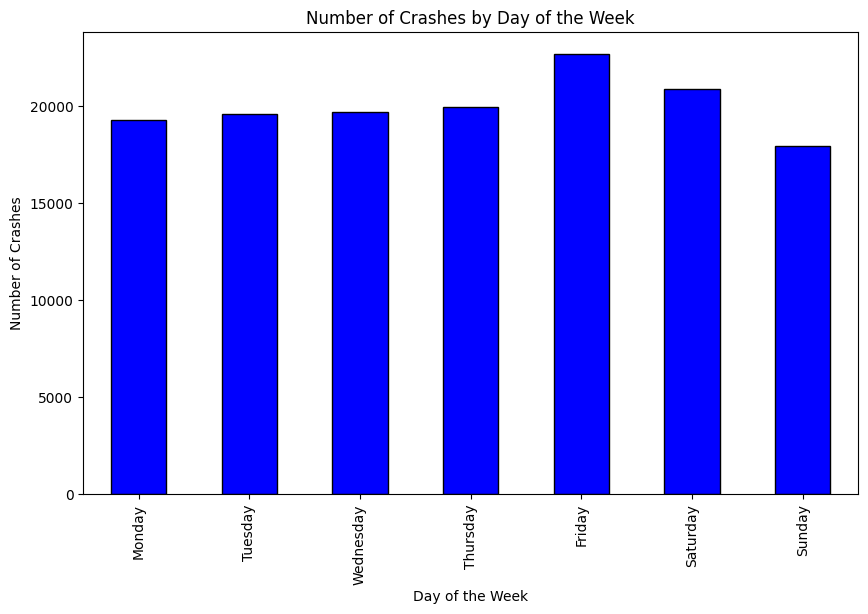

In [33]:
crash_day_counts = temp_df['crash_day'].value_counts()
sorted_days = list(calendar.day_name)
plt.figure(figsize=(10, 6))
crash_day_counts.loc[sorted_days].plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

In [34]:
# Friday and Saturday: Most crashes

In [35]:
# Severity of each week day
fatal_incapacitating_counts = temp_df['most_severe_injury'].isin(['fatal', 'incapacitating injury']).groupby(temp_df['crash_day']).sum()
fatal_incapacitating_table = pd.DataFrame({'Weekday': fatal_incapacitating_counts.index, 'Total Fatal/Incapacitating': fatal_incapacitating_counts.values})
weekday_order = list(calendar.day_name)
fatal_incapacitating_table['Weekday'] = pd.Categorical(fatal_incapacitating_table['Weekday'], categories=weekday_order, ordered=True)
fatal_incapacitating_table = fatal_incapacitating_table.sort_values('Weekday')
fatal_incapacitating_table


Weekday  Total Fatal/Incapacitating
1     Monday                         402
5    Tuesday                         355
6  Wednesday                         375
4   Thursday                         378
0     Friday                         415
2   Saturday                         461
3     Sunday                         447

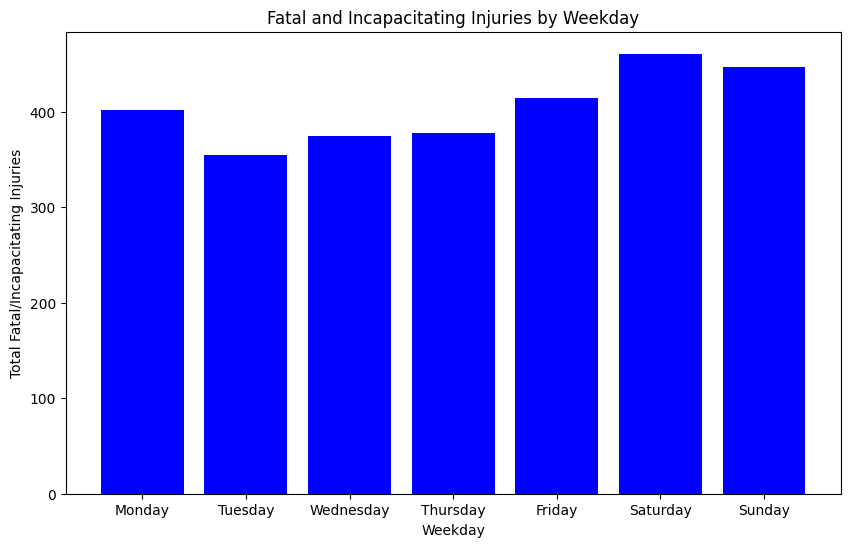

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(fatal_incapacitating_table['Weekday'], fatal_incapacitating_table['Total Fatal/Incapacitating'], color='blue')
plt.title('Fatal and Incapacitating Injuries by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Fatal/Incapacitating Injuries')
plt.show()

In [37]:
# While Friday has the highest overall number of crashes, Saturday stands out as the day with the most fatal injuries.

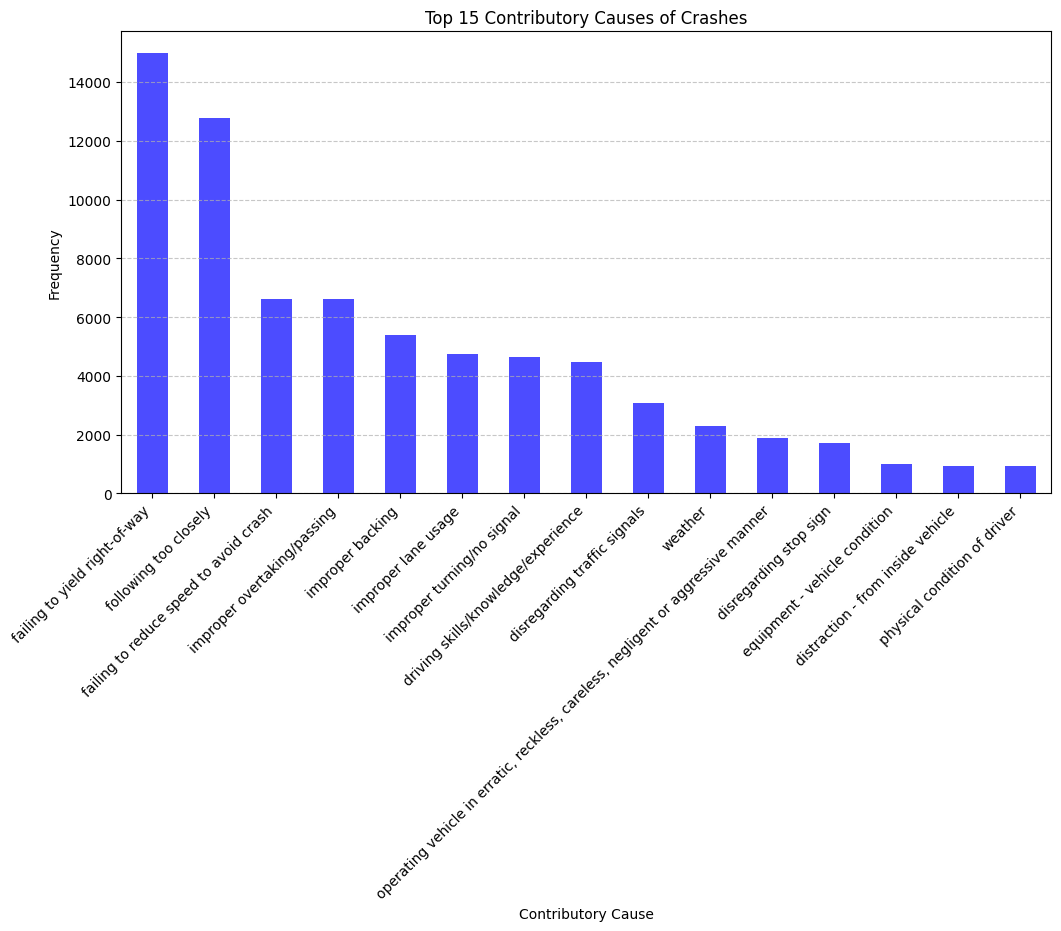

In [38]:
# Contributory causes
filtered_contributory_causes = temp_df[~temp_df['contributory_cause'].isin(['unable to determine', 'not applicable'])]

top_contributory_causes = filtered_contributory_causes['contributory_cause'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_contributory_causes.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 15 Contributory Causes of Crashes')
plt.xlabel('Contributory Cause')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
# key contributors to road accidents: issues with yielding right of way, maintaining a safe following distance, overtaking, not adjusting speed, and improper backing maneuvers.

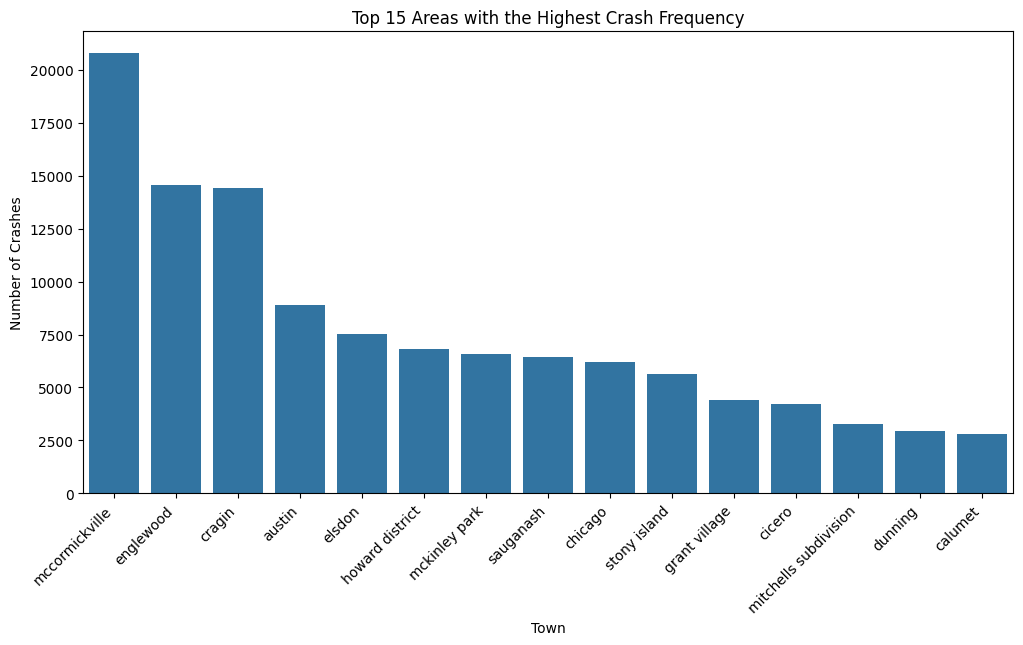

In [40]:
# Locations with highest frequency of crashes
top_towns = temp_df['town'].value_counts().head(15)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_towns.index, y=top_towns.values)
plt.title('Top 15 Areas with the Highest Crash Frequency')
plt.xlabel('Town')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')

plt.show()

In [41]:
# Weather conditions
weather_data = temp_df[temp_df['contributory_cause'] == 'weather']
weather_conditions = weather_data['conditions'].value_counts()
print(weather_conditions)

conditions
Overcast                  625
Partially cloudy          580
Rain, Overcast            381
Snow, Overcast            317
Rain, Partially cloudy    187
Clear                     141
Snow, Partially cloudy     64
Rain                        1
Name: count, dtype: int64


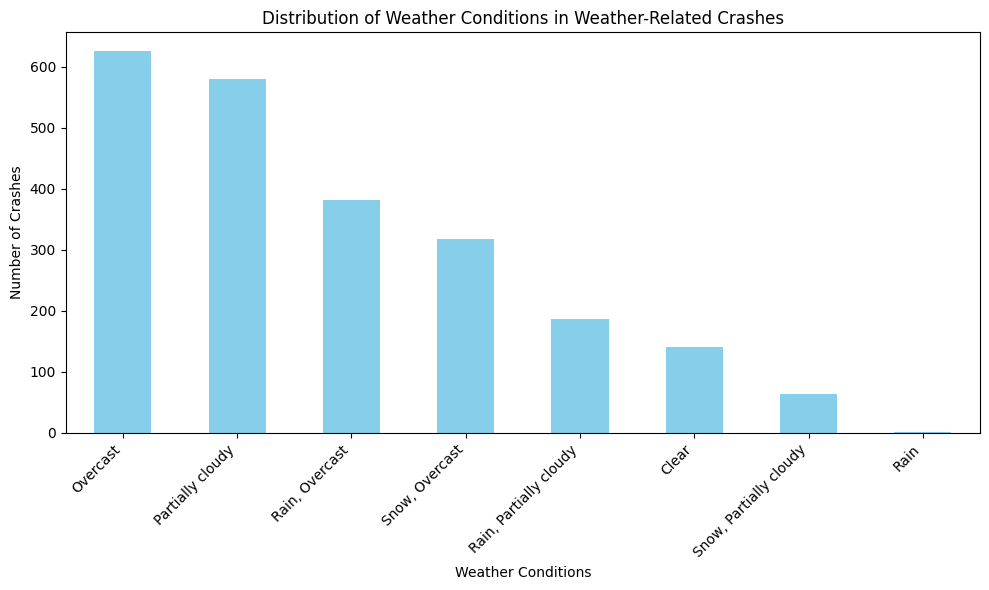

In [42]:
plt.figure(figsize=(10, 6))
weather_conditions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Weather Conditions in Weather-Related Crashes')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
# Show the plot
plt.show()

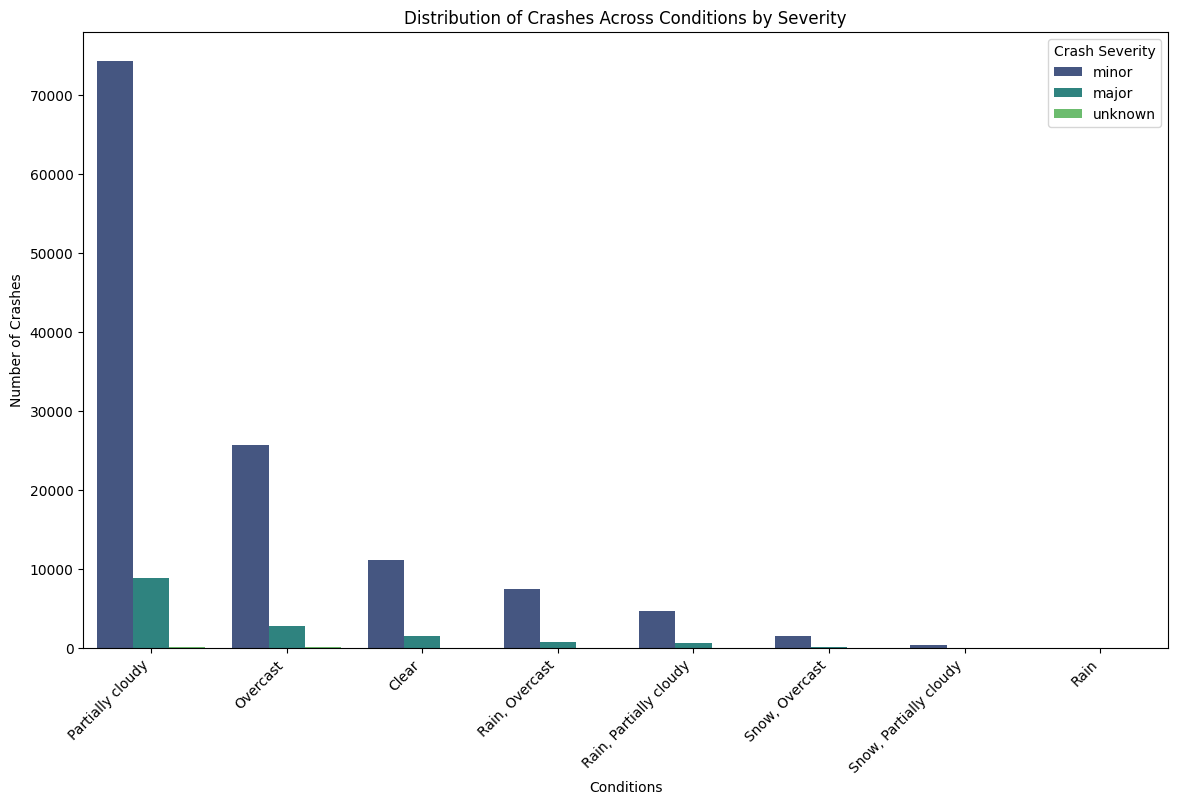

In [43]:
plt.figure(figsize=(14, 8))
sns.countplot(x='conditions', hue='crash_severity_2', data=temp_df, order=temp_df['conditions'].value_counts().index, palette='viridis')
plt.title('Distribution of Crashes Across Conditions by Severity')
plt.xlabel('Conditions')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Crash Severity', loc='upper right')
plt.show()

In [44]:
# Overcast and Partially Cloudy weather are common during crashes, underscoring the importance of considering weather factors in road 
# safety measures.

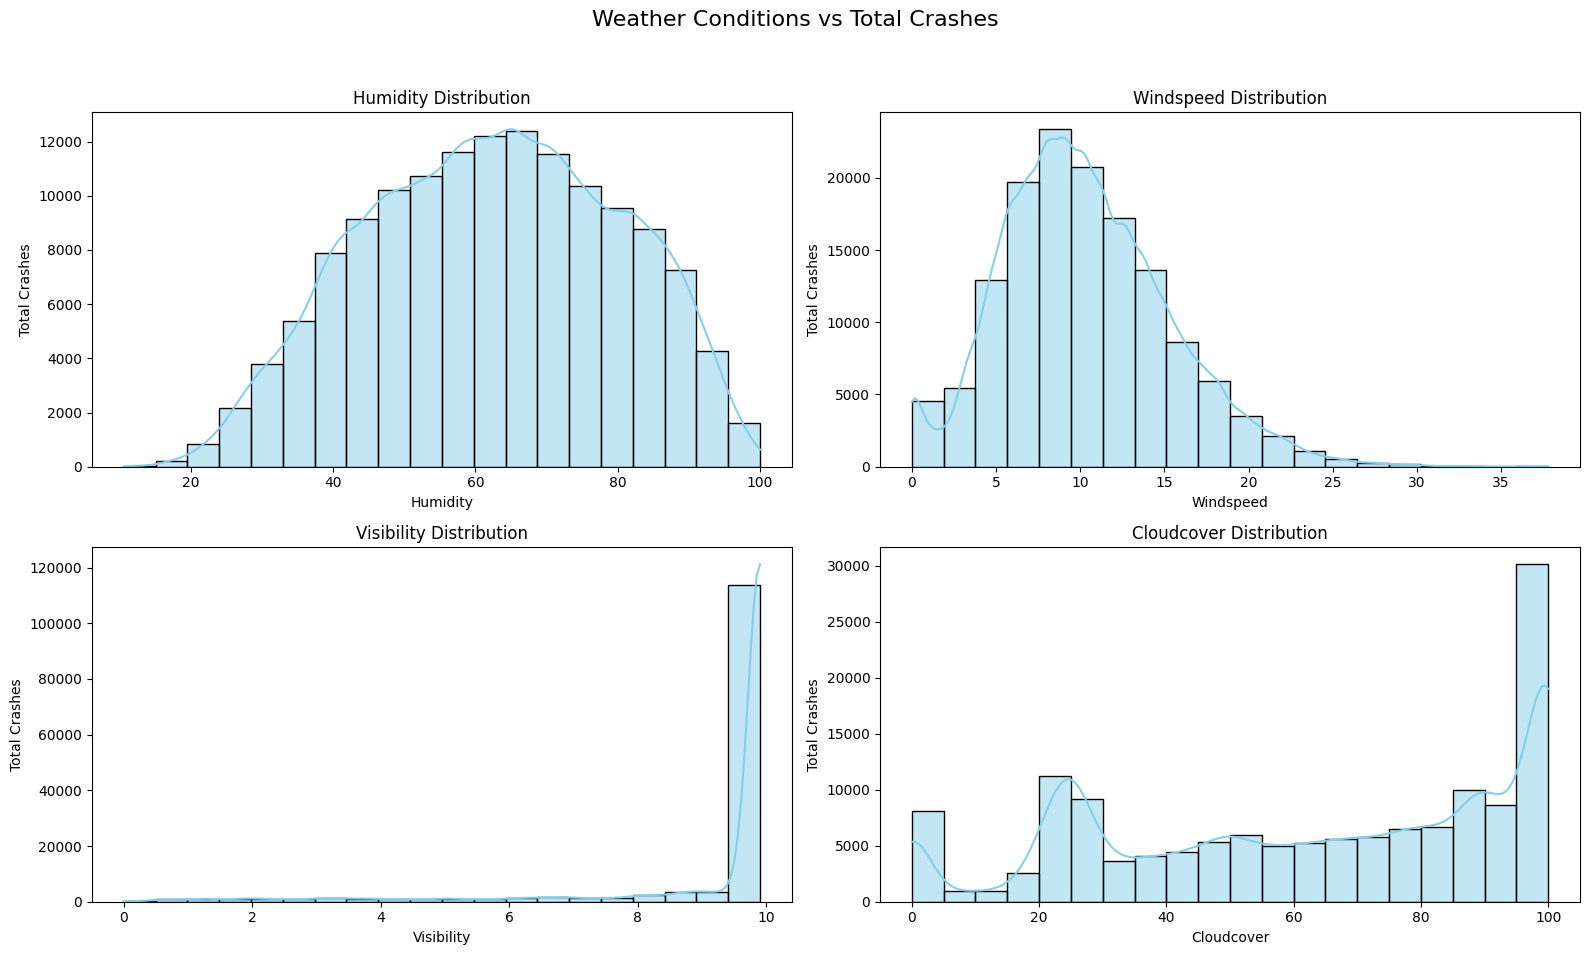

In [45]:
weather_columns = ['humidity', 'windspeed', 'visibility', 'cloudcover']
num_bins = 20
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Weather Conditions vs Total Crashes', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(weather_columns):
    filtered_data = temp_df[(temp_df[column].notnull())]
    sns.histplot(x=column, data=filtered_data, bins=num_bins, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column.capitalize()} Distribution')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Total Crashes')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

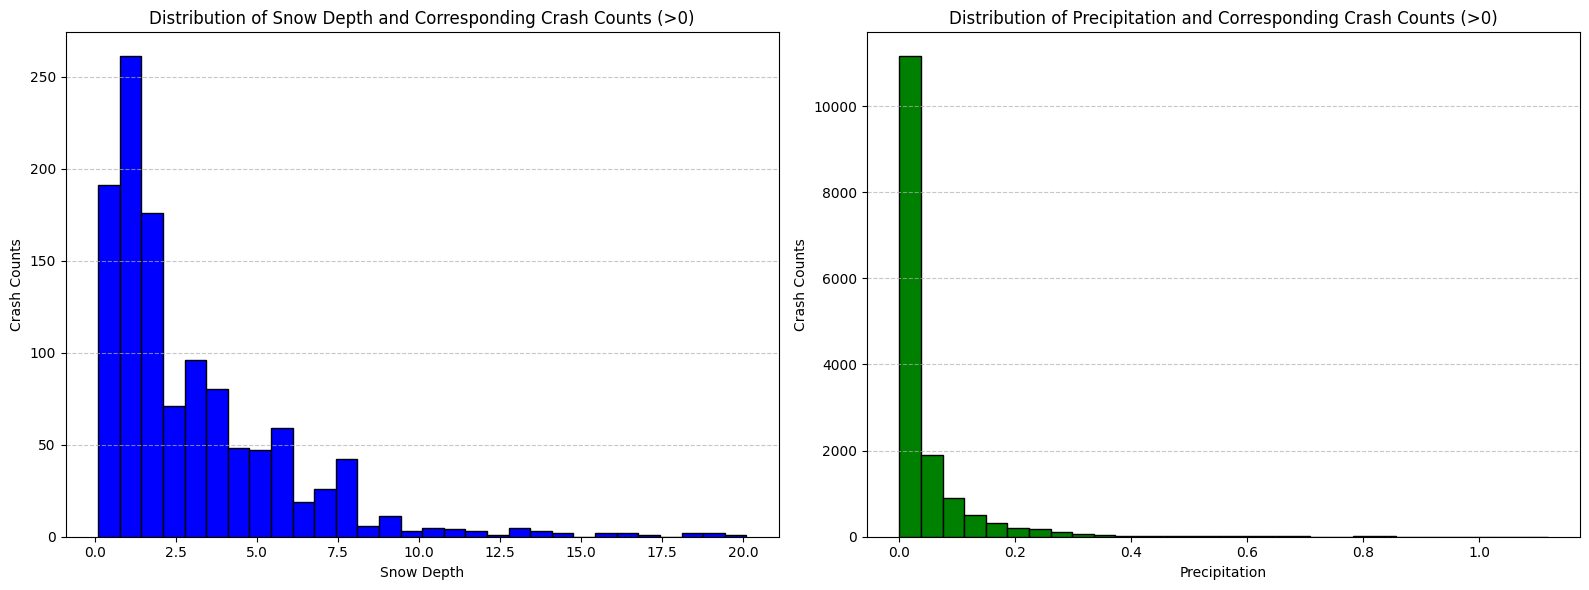

In [46]:
snowdepth_counts = temp_df['snowdepth'].value_counts().sort_index()
precip_counts = temp_df['precip'].value_counts().sort_index()
snowy_data = temp_df[temp_df['snowdepth'] > 0]
precip_data = temp_df[temp_df['precip'] > 0]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
axes[0].hist(snowy_data['snowdepth'], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Snow Depth and Corresponding Crash Counts (>0)')
axes[0].set_xlabel('Snow Depth')
axes[0].set_ylabel('Crash Counts')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].hist(precip_data['precip'], bins=30, color='green', edgecolor='black')
axes[1].set_title('Distribution of Precipitation and Corresponding Crash Counts (>0)')
axes[1].set_xlabel('Precipitation')
axes[1].set_ylabel('Crash Counts')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [47]:
# road accidents occur with the highest frequency occur during:
# Humidity: 55 - 70
# Windspeed: 5.5-12.5
# Visibility: 10
# Cloud Cover: 100
# Snow Depth: 0 - 0.1
# Precipation: 0.0 - 0.1

In [48]:
# Crashes by month / season
temp_df['crash_date'] = pd.to_datetime(temp_df['crash_date'])
temp_df['year'] = temp_df['crash_date'].dt.year
temp_df['month'] = temp_df['crash_date'].dt.month_name()
filtered_data = temp_df[temp_df['year'] != 2018]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crash_count_table = filtered_data.groupby(['year', 'month']).size().reset_index(name='crash_count')
crash_count_table['month'] = pd.Categorical(crash_count_table['month'], categories=month_order, ordered=True)
pivot_data = crash_count_table.pivot(index='year', columns='month', values='crash_count').fillna(0)
pivot_data

month  January  February   March   April     May    June    July  August  \
year                                                                       
2019    3299.0    3072.0  3498.0  3391.0  3825.0  3896.0  3903.0  3642.0   
2020    3326.0    3353.0  2513.0  1692.0  2559.0  2944.0  3458.0  3518.0   
2021    2709.0    3200.0  2921.0  3034.0  3734.0  3850.0  3822.0  3789.0   
2022    3031.0    2876.0  3218.0  3165.0  3653.0  3462.0  1505.0     0.0   

month  September  October  November  December  
year                                           
2019      3589.0   3727.0    3484.0    3616.0  
2020      3185.0   3216.0    2717.0    2781.0  
2021      3582.0   3851.0    3195.0    3157.0  
2022         0.0      0.0       0.0       0.0

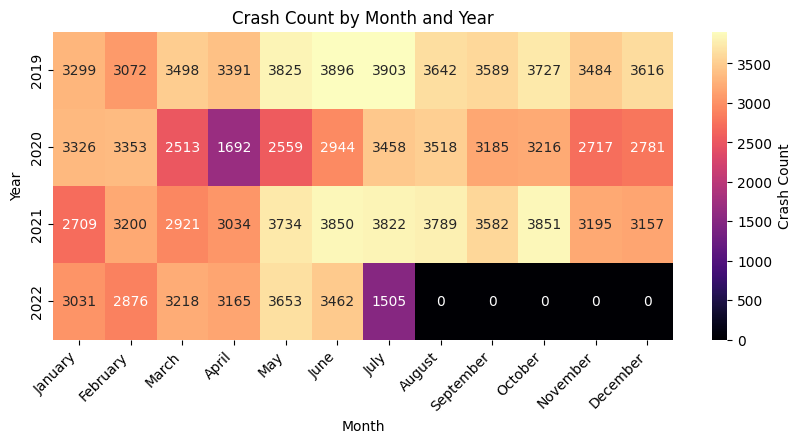

In [49]:
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_data, cmap='magma', annot=True, fmt='g', cbar_kws={'label': 'Crash Count'},)
plt.title('Crash Count by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.show()

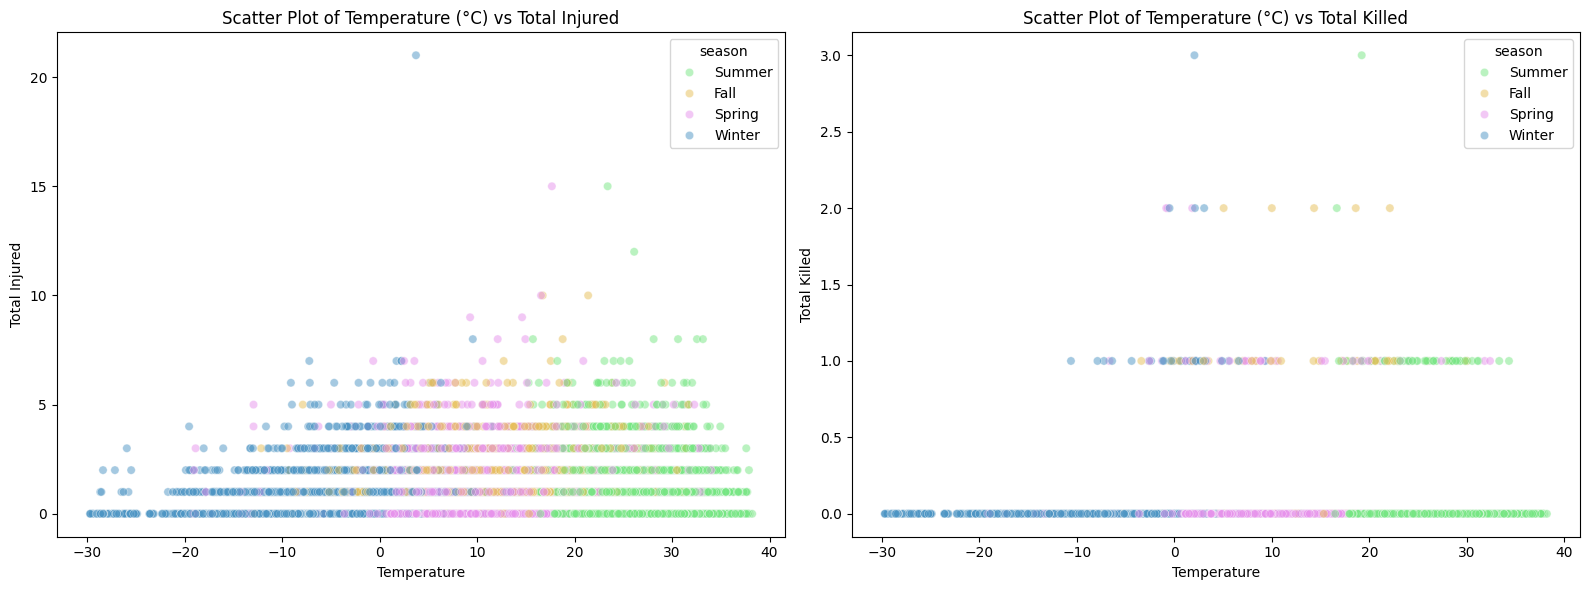

In [50]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
temp_df['season'] = temp_df['crash_date'].dt.month.apply(get_season)
season_colors = {'Winter': '#4D95C4', 'Spring': '#E793EC', 'Summer': '#76E683', 'Fall': '#E7BF57'}
temp_df['temp_cels'] = (temp_df['temp'] - 32) * 5 / 9
filtered_data_injured = temp_df[temp_df['total_injured'] >= 0]
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='temp_cels', y='total_injured', data=filtered_data_injured, alpha=0.5, palette=season_colors, hue='season', legend='full')
plt.title('Scatter Plot of Temperature (°C) vs Total Injured')
plt.xlabel('Temperature')
plt.ylabel('Total Injured')
filtered_data_killed = temp_df[temp_df['total_killed'] >= 0]
plt.subplot(1, 2, 2)
sns.scatterplot(x='temp_cels', y='total_killed', data=filtered_data_killed, alpha=0.5, palette=season_colors, hue='season', legend='full')
plt.title('Scatter Plot of Temperature (°C) vs Total Killed')
plt.xlabel('Temperature')
plt.ylabel('Total Killed')
plt.tight_layout()
plt.show()

In [51]:
# During the spring and early summer, road accidents occur with the highest frequency, likely attributable to increased outdoor 
# activities and social events, including higher instances of drinking.

In [52]:
# which crash types are the most fatal
crash_type_summary = temp_df[temp_df['total_killed'] >= 0].groupby('crash_type')['total_killed'].sum().reset_index()
crash_type_summary.columns = ['crash_type', 'total_killed']
crash_type_summary = crash_type_summary.sort_values(by='total_killed', ascending=False)
crash_type_summary

crash_type  total_killed
9                     pedestrian            47
2                   fixed object            47
0                          angle            28
3                        head on            13
7           parked motor vehicle            13
17                       turning            13
10                      rear end            10
5                   other object             4
8                   pedalcyclist             4
15      sideswipe same direction             4
14  sideswipe opposite direction             2
16                         train             1
4             other noncollision             0
6                     overturned             0
1                         animal             0
11                 rear to front             0
12                  rear to rear             0
13                  rear to side             0

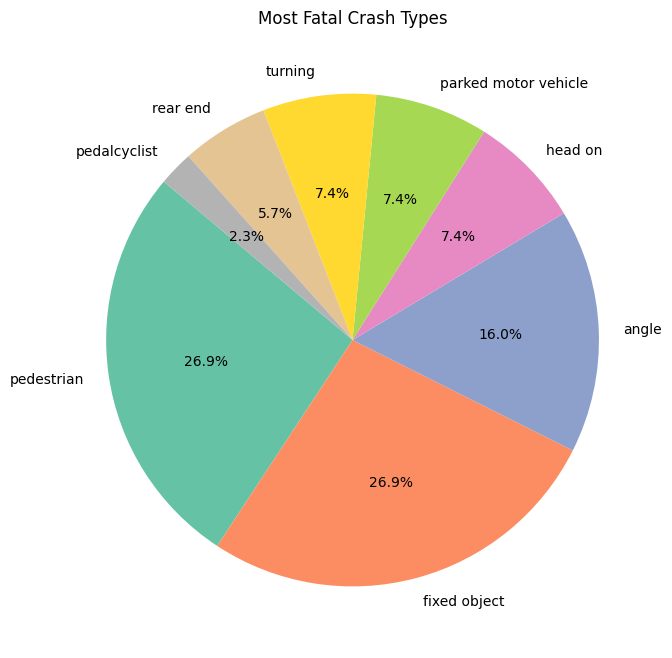

In [53]:
sorted_crash_types = crash_type_summary.sort_values(by='total_killed', ascending=False)
top_n = 8
selected_crash_types = sorted_crash_types.head(top_n)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2', n_colors=top_n)
plt.pie(selected_crash_types['total_killed'], labels=selected_crash_types['crash_type'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Most Fatal Crash Types')
plt.show()

In [54]:
# Pedestrian: Pedestrian accidents are often severe, as pedestrians are more vulnerable in traffic scenarios.
# Fixed Object: Drivers or passengers involved in crashes with fixed objects have a higher likelihood of sustaining fatal injuries.
# Angle: Angle crashes typically involve collisions at intersections, where the fronts of two vehicles intersect.

In [55]:
# Contributory cause danger
contributory_cause_table = temp_df[temp_df['total_killed'] >= 0].groupby('contributory_cause').agg({
    'total_killed': 'sum',
    'contributory_cause': 'count'
}).rename(columns={'contributory_cause': 'total_crashes'}).reset_index()
contributory_cause_table['death_ratio'] = (contributory_cause_table['total_killed'] / contributory_cause_table['total_crashes']) * 100
contributory_cause_table.sort_values(by='total_killed', ascending=False)

contributory_cause  total_killed  \
36                                unable to determine            66   
17             failing to reduce speed to avoid crash            22   
6                        disregarding traffic signals            19   
30                       physical condition of driver            15   
18                      failing to yield right-of-way            12   
26                                     not applicable            11   
28  operating vehicle in erratic, reckless, carele...            10   
37  under the influence of alcohol/drugs (use when...             7   
11                    driving on wrong side/wrong way             4   
23                        improper overtaking/passing             3   
22                                improper lane usage             3   
14  evasive action due to animal, object, nonmotorist             2   
9                  distraction - from outside vehicle             2   
39                                            weather             1   
24                         improper turning/no signal             1   
38  vision obscured (signs, tree limbs, buildings,...             1   
15                   exceeding authorized speed limit             1   
16                exceeding safe speed for conditions             1   
3                    disregarding other traffic signs             1   
19                              following too closely             1   
13                      equipment - vehicle condition             1   
21                                   improper backing             1   
5                              disregarding stop sign             1   
31                                related to bus stop             0   
33           road engineering/surface/marking defects             0   
35                               turning right on red             0   
34                                            texting             0   
29                         passing stopped school bus             0   
32                      road construction/maintenance             0   
0                                              animal             0   
27                              obstructed crosswalks             0   
25          motorcycle advancing legally on red light             0   
1              bicycle advancing legally on red light             0   
12                driving skills/knowledge/experience             0   
10  distraction - other electronic device (navigat...             0   
8                   distraction - from inside vehicle             0   
7                             disregarding yield sign             0   
4                          disregarding road markings             0   
2                   cell phone use other than texting             0   
20    had been drinking (use when arrest is not made)             0   

    total_crashes  death_ratio  
36          55012     0.119974  
17           6611     0.332779  
6            3079     0.617083  
30            929     1.614639  
18          14972     0.080150  
26           7189     0.153012  
28           1888     0.529661  
37            803     0.871731  
11            816     0.490196  
23           6606     0.045413  
22           4739     0.063304  
14            252     0.793651  
9             613     0.326264  
39           2271     0.044033  
24           4638     0.021561  
38            836     0.119617  
15             90     1.111111  
16            104     0.961538  
3             314     0.318471  
19          12770     0.007831  
13            987     0.101317  
21           5367     0.018632  
5            1699     0.058858  
31             98     0.000000  
33            348     0.000000  
35             94     0.000000  
34             54     0.000000  
29             19     0.000000  
32            266     0.000000  
0             108     0.000000  
27             24     0.000000  
25              4     0.000000  
1               8     0.000000  
1

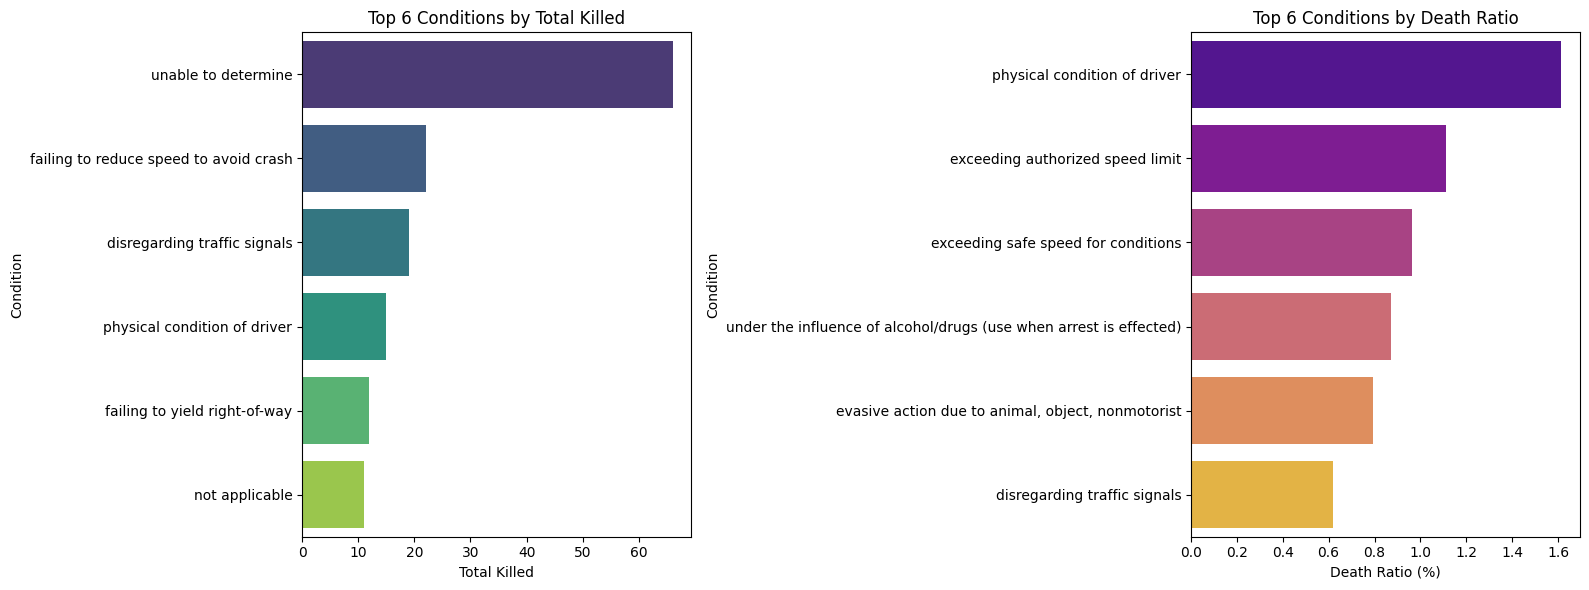

In [56]:
top_conditions_total_killed = contributory_cause_table.sort_values('total_killed', ascending=False).head(6)
top_conditions_death_ratio = contributory_cause_table.sort_values('death_ratio', ascending=False).head(6)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x='total_killed', y='contributory_cause', data=top_conditions_total_killed, ax=axes[0], palette='viridis')
axes[0].set_title('Top 6 Conditions by Total Killed')
axes[0].set_xlabel('Total Killed')
axes[0].set_ylabel('Condition')
sns.barplot(x='death_ratio', y='contributory_cause', data=top_conditions_death_ratio, ax=axes[1], palette='plasma')
axes[1].set_title('Top 6 Conditions by Death Ratio')
axes[1].set_xlabel('Death Ratio (%)')
axes[1].set_ylabel('Condition')
plt.tight_layout()
plt.show()

In [57]:
# The most frequent fatalities are caused by disregarding traffic signals, the physical condition of the driver, and failing to 
# reduce speed. Conditions more likely to result in a fatality include physical condition of the driver, disregarding road markings, 
# and disregarding traffic signals.

In [58]:
filtered_data = temp_df.sort_values('num_vehicles_in_crash', ascending=False).head(16)
avg_vehicles_by_cause = filtered_data.groupby('contributory_cause')['num_vehicles_in_crash'].mean().reset_index()
avg_vehicles_by_cause = avg_vehicles_by_cause.sort_values(by='num_vehicles_in_crash', ascending=False).head(7)
avg_vehicles_by_cause

contributory_cause  num_vehicles_in_crash
5  operating vehicle in erratic, reckless, carele...                   11.0
7                                unable to determine                   11.0
6                       physical condition of driver                   10.0
0                   exceeding authorized speed limit                    9.0
1             failing to reduce speed to avoid crash                    9.0
2                                improper lane usage                    9.0
3                        improper overtaking/passing                    9.0

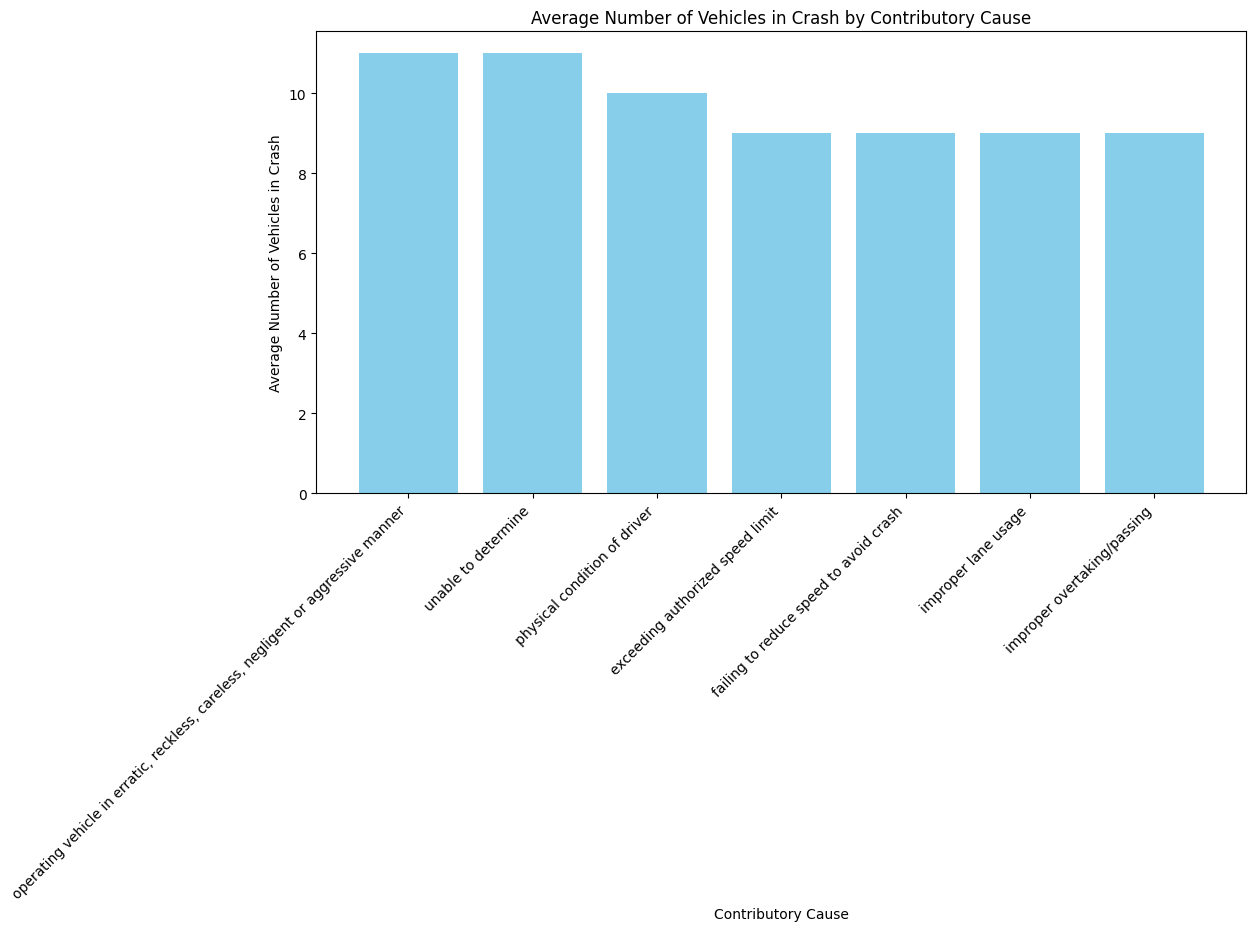

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(avg_vehicles_by_cause['contributory_cause'], avg_vehicles_by_cause['num_vehicles_in_crash'], color='skyblue')
plt.xlabel('Contributory Cause')
plt.ylabel('Average Number of Vehicles in Crash')
plt.title('Average Number of Vehicles in Crash by Contributory Cause')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
# Vehicles typically sustain damage when the driver is under the influence of alcohol or drugs or engages in reckless driving behavior.

In [61]:
# Traffic control & reduse danger
traffic_control_device_table = temp_df[temp_df['total_killed'] >= 0].groupby('traffic_control_device').agg({
    'total_killed': 'sum',
    'traffic_control_device': 'count'
}).rename(columns={'traffic_control_device': 'total_crashes'}).reset_index()
traffic_control_device_table['death_ratio'] = (traffic_control_device_table['total_killed'] / traffic_control_device_table['total_crashes']) * 100
traffic_control_device_table_sorted = traffic_control_device_table.sort_values(by='death_ratio', ascending=False)
traffic_control_device_table_sorted

traffic_control_device  total_killed  total_crashes  death_ratio
12    railroad crossing gate             3             79     3.797468
10  pedestrian crossing sign             2            134     1.492537
18                     yield             1            199     0.502513
6                      other             3            956     0.313808
16            traffic signal            61          38962     0.156563
4                no controls           100          79743     0.125403
15         stop sign/flasher            14          14216     0.098481
17                   unknown             2           4720     0.042373
11            police/flagman             0             46     0.000000
14               school zone             0             32     0.000000
13          rr crossing sign             0             31     0.000000
0      bicycle crossing sign             0              7     0.000000
1                delineators             0             58     0.000000
8            other reg. sign             0            178     0.000000
7    other railroad crossing             0             22     0.000000
5                 no passing             0             10     0.000000
3           lane use marking             0             63     0.000000
2    flashing control signal             0             82     0.000000
9         other warning sign             0            121     0.000000

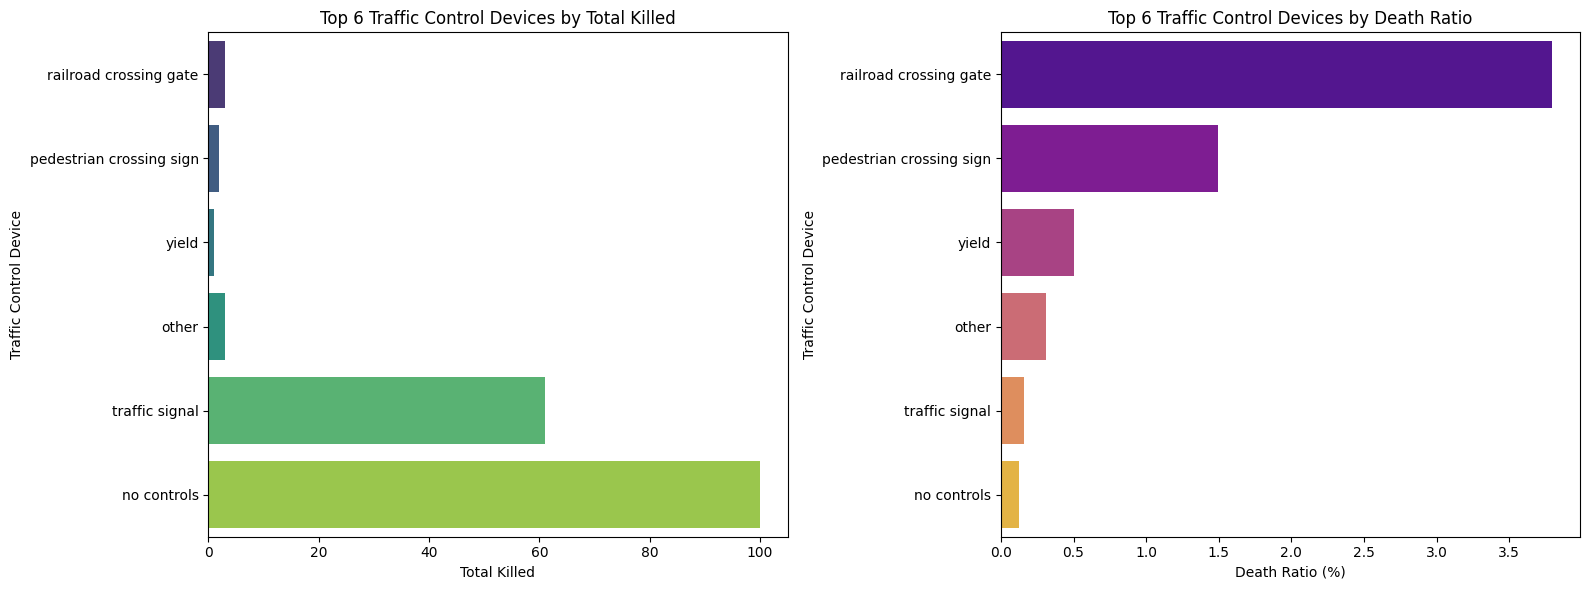

In [62]:
top_conditions_total_killed = traffic_control_device_table_sorted.head(6)
top_conditions_death_ratio = traffic_control_device_table_sorted.sort_values('death_ratio', ascending=False).head(6)
# Plotting the bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x='total_killed', y='traffic_control_device', data=top_conditions_total_killed, ax=axes[0], palette='viridis')
axes[0].set_title('Top 6 Traffic Control Devices by Total Killed')
axes[0].set_xlabel('Total Killed')
axes[0].set_ylabel('Traffic Control Device')
sns.barplot(x='death_ratio', y='traffic_control_device', data=top_conditions_death_ratio, ax=axes[1], palette='plasma')
axes[1].set_title('Top 6 Traffic Control Devices by Death Ratio')
axes[1].set_xlabel('Death Ratio (%)')
axes[1].set_ylabel('Traffic Control Device')
plt.tight_layout()
plt.show()

In [63]:
# the most fatalities occur when the traffic signal is active, railroad crossings and pedestrian crossings have the highest fatality ratios.

In [64]:
# Road defects & car crash severity and frequency
road_defect_table = temp_df[temp_df['total_killed'] >= 0].groupby('road_defect').agg({
    'total_killed': 'sum',
    'total_injured': 'sum',
    'road_defect': 'count'
}).rename(columns={'road_defect': 'total_crashes'}).reset_index()
road_defect_table['death_ratio'] = (road_defect_table['total_killed'] / road_defect_table['total_crashes']) * 100
road_defect_table['injury_ratio'] = (road_defect_table['total_injured'] / road_defect_table['total_crashes']) * 100
road_defect_table

road_defect  total_killed  total_injured  total_crashes  death_ratio  \
0  debris on roadway             1             34            124     0.806452   
1         no defects           151          23886         113357     0.133207   
2              other             3            132            708     0.423729   
3         rut, holes             0            134           1096     0.000000   
4    shoulder defect             0             76            255     0.000000   
5            unknown            28           4047          23598     0.118654   
6       worn surface             3            141            521     0.575816   

   injury_ratio  
0     27.419355  
1     21.071482  
2     18.644068  
3     12.226277  
4     29.803922  
5     17.149758  
6     27.063340

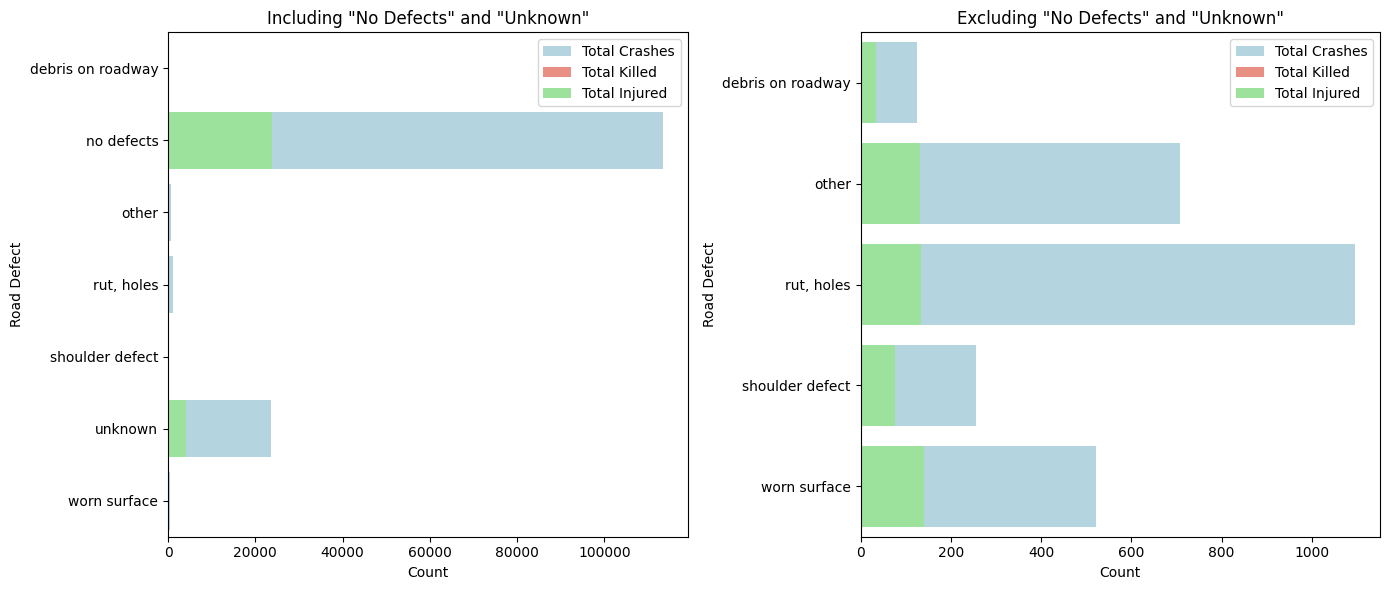

In [65]:
filtered_road_defect_table = road_defect_table[~road_defect_table['road_defect'].isin(['no defects', 'unknown'])]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='total_crashes', y='road_defect', data=road_defect_table, color='lightblue', label='Total Crashes', ax=axes[0])
sns.barplot(x='total_killed', y='road_defect', data=road_defect_table, color='salmon', label='Total Killed', ax=axes[0])
sns.barplot(x='total_injured', y='road_defect', data=road_defect_table, color='lightgreen', label='Total Injured', ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Road Defect')
axes[0].set_title('Including "No Defects" and "Unknown"')
sns.barplot(x='total_crashes', y='road_defect', data=filtered_road_defect_table, color='lightblue', label='Total Crashes', ax=axes[1])
sns.barplot(x='total_killed', y='road_defect', data=filtered_road_defect_table, color='salmon', label='Total Killed', ax=axes[1])
sns.barplot(x='total_injured', y='road_defect', data=filtered_road_defect_table, color='lightgreen', label='Total Injured', ax=axes[1])
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Road Defect')
axes[1].set_title('Excluding "No Defects" and "Unknown"')
plt.tight_layout()
plt.show()

In [66]:
# Rut holes and worn surfaces are the prevalent issues encountered on roads (ignoring other category)

In [67]:
selected_road_defects = ['rut, holes', 'worn surface']
filtered_crashes = temp_df[temp_df['road_defect'].isin(selected_road_defects)]
filtered_crashes
total_crashes = len(filtered_crashes)
print("total crashes in rut holes / worn surface category:", total_crashes)
contributory_causes = ['road construction/maintenance', 'road engineering/surface/marking defects']
filtered_crashes_contrib = filtered_crashes[filtered_crashes['contributory_cause'].isin(contributory_causes)]
total_crashes_2 = len(filtered_crashes_contrib)
print("contributed by road condition:", total_crashes_2)
percentage = (total_crashes_2 / total_crashes) * 100
print(f"The percentage is: {round(percentage)}%")

total crashes in rut holes / worn surface category: 1621
contributed by road condition: 324
The percentage is: 20%
